# Unsupervised Learning

While supervised learning is learning how to associate an outcome variable $y$, for example an image class, to an input $x$, which means that we are learning a function

$$y_{pred} = f(x),$$

unsupervised learning does not have any target to learn. It is more about *understanding the structure of the data* $\mathcal D$.

Unsupervised learning is a rather vast field, which is hard to summarize mathematically. One thing that most supervised methods have in common is that they, either explicitly, or implicitly, attempt to find a model that maximizes the probability of the data. One can write this as

$$\textrm{maximize } \mathbb E_{x\sim\mathcal D}\log p_\vartheta(x),$$

where $p_\vartheta$ is some probabilistic model of the data, $\mathcal D\subset\mathbb R^n$.

Note that maximizing the probability of the data under the model should entail that the probability assigned by the model to regions outside the data will be kept as minimal as possible by the model.

In this notebook we will use `numpy` and `scikit-learn` to investigate classical methods of unsupervised learning.

We will analyze **clustering** methods and **subspace** methods of representing data

## Clustering methods


In general, clustering can be seen as finding a grouping/partition of all available data points such that data points within the same group are (by some metric) similar to each other.

<img src="images/clustering_methods.png" alt="different clustering methods. image credit: https://scikit-learn.org/stable/modules/clustering.html"></img>
(Find this image in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html))

One archetype of clustering methods is called K-means, and we will discover it here before moving on to scikit-learn implementations.

### K-Means Family
If you know or assume that your data points are clustered around a known or unknown number of *centers*, then K-means might be a good option to summarize the data.

One notion of *being clustered around a number of centers* is the finding that the distances of cluster points to their cluster centers are **much** lower than the distances of the points to the center of all the data points. One must be very careful with this notion, though, because the more cluster centers one adds, the lower the distance of each point to its cluster center will become and eventually, the distances will be 0 when each point is its own cluster.

#### K-means

To get an idea of what K-means does, let's generate some clustered Gaussian data.

In [1]:
import numpy as np
from sklearn.cluster import KMeans

n_samples = 1000
K = 5
dim = 2
centers = np.random.randn(K, dim)
affiliations = np.random.randint(0, K, n_samples)
noise = np.random.randn(n_samples, dim) * .2

X = noise + centers[affiliations]

We use the `KMeans` estimator to analyze our data with the correct number of clusters specified.

In [2]:
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

We plot the clusters in different colors

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

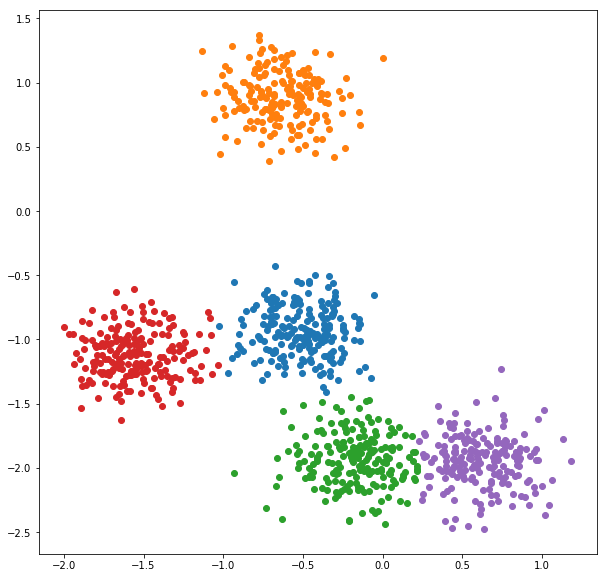

In [4]:
plt.figure(figsize=(10, 10))
for i in range(K):
    cluster = X[kmeans.labels_ == i] 
    plt.plot(*cluster.T, 'o')

### K-means theory

Let's take a look a K-means specifically. Assume that we have a set of $n$ observations, $x_1, \dots, x_n$. We would like to assign each one of them to one of $k$ sets $S_1,\dots,S_k$, such that each $x_j$ is in exactly one $S_i$, its *cluster*.

Let's call $\mu_i$ the *center* of each cluster $S_i$. Then we can find the distances of each point in the cluster to this center, and sum them up, to get a sort of "amount of spread-out-ness":
$$\rho_i = \sum_{n\in S_i} d(x_n, \mu_i)^2$$

If we add up the spread-out-ness of all the clusters, we arrive at
$$\rho = \sum_{i=1}^k\rho_i = \sum_{i=1}^k \sum_{n\in S_i} d(x_n, \mu_i)^2$$

This formula is called the **K-means objective**. In its typical form, we would use the Euclidean distance $d(x, y) = \|x - y\|$, and with that the formula becomes
$$\rho = \sum_{i=1}^k \sum_{n\in S_i} \|x_n - \mu_i\|^2$$

**Finding a K-means clustering**
We would now like to find 1) Cluster centers $\mu_i$ and 2) Cluster associations $S_i$.

How could we go about doing this? Let us break down the problem a bit, into two questions:

**(a)** If we have the cluster centers, can we figure out which data point goes in which cluster?

**(b)** If we have the cluster associations, how would we choose the best center?

It turns out that we can quite straightforwardly answer both of these questions:

**(a)** Let's assume that we know the cluster centers $\mu_i$. To which cluster should we associate $x$ in order to minimize $\rho$? Well, probably to the closest one:
$$\arg\min_i d(\mu_i, x) $$
**(b)** Now let's assume that we know all the members associated with cluster $S_i$. How do we choose its center $\mu_i$? Well, how about the point that minimizes the sum of all distances to it, i.e. the spread-out-ness $\rho_i$:
$$\arg\min_{\mu_i} \rho_i = \arg\min_{\mu_i}\sum_{x_n\in S_i}d(x_n, \mu_i)^2$$

When we use the Euclidean norm, we can easily find the exact minimum of this equation:

The derivative of $\|x_n - \mu_i\|^2$ is $2(x_n - \mu_i)$, so the derivative of $\rho_i$ with respect to $\mu_i$ is 
$$\nabla_{\mu_i}\sum_{x_n\in S_i}\|x_n - \mu_i\|^2 = \sum_{x_n\in S_i}2(x_n - \mu_i) = \sum_{x_n\in S_i}2x_n - \sum_{x_n\in S_i}2\mu_i = \sum_{x_n\in S_i}2x_n - 2|S_i|\mu_i$$
Setting the derivative to 0, we find that
$$\mu_i = \frac{1}{|S_i|}\sum_{x_n\in S_i}x_n,$$
the average of the samples associated with $S_i$.

How do we use this to get the  clusters? We have created something of a **chicken and egg problem**: 1 and 2 depend on each other. But where to start?

Well, how about we try starting with random assignments. 

As a matter of fact, why don't we split this into an exercise:

**Exercise 01:** Implement K-means.

Parts **1\.** and **2\.** will implement b

Parts **3\.** and **4\.** will implement a

In [5]:
assignments = np.random.randint(0, K, n_samples)
assignments

array([1, 4, 0, 0, 2, 0, 0, 4, 2, 0, 2, 0, 2, 3, 1, 3, 1, 3, 4, 1, 4, 0,
       4, 0, 1, 3, 1, 0, 4, 2, 3, 2, 2, 4, 3, 4, 2, 1, 3, 0, 2, 0, 4, 4,
       0, 1, 2, 0, 3, 4, 4, 1, 1, 2, 3, 2, 0, 4, 3, 1, 2, 2, 4, 2, 1, 0,
       4, 3, 4, 0, 0, 3, 2, 1, 1, 4, 4, 1, 4, 0, 0, 0, 4, 4, 1, 3, 3, 1,
       2, 0, 1, 2, 2, 3, 4, 0, 1, 2, 4, 3, 0, 1, 4, 2, 0, 1, 2, 1, 0, 0,
       3, 1, 4, 0, 0, 3, 1, 1, 4, 3, 3, 1, 4, 2, 2, 3, 4, 4, 4, 2, 1, 2,
       1, 3, 2, 4, 2, 2, 2, 2, 1, 2, 0, 1, 3, 0, 1, 1, 3, 3, 2, 1, 1, 0,
       0, 3, 2, 2, 2, 3, 1, 4, 2, 1, 3, 0, 4, 4, 1, 4, 2, 4, 0, 2, 4, 4,
       3, 0, 1, 2, 4, 1, 2, 0, 0, 4, 4, 3, 0, 2, 1, 0, 3, 3, 2, 1, 3, 2,
       2, 1, 0, 0, 4, 1, 2, 4, 1, 4, 0, 4, 4, 3, 1, 3, 4, 3, 3, 1, 0, 0,
       1, 2, 3, 4, 3, 3, 4, 0, 2, 0, 2, 4, 2, 0, 4, 2, 0, 3, 3, 2, 1, 2,
       1, 2, 3, 1, 0, 1, 4, 3, 1, 3, 1, 0, 4, 2, 3, 3, 2, 0, 2, 0, 2, 0,
       0, 3, 1, 4, 1, 0, 3, 3, 2, 4, 1, 2, 4, 0, 3, 4, 4, 3, 4, 1, 1, 3,
       4, 1, 3, 4, 2, 3, 1, 2, 2, 3, 1, 2, 4, 3, 2,

**1\.** Above is a random assignment matrix called `assignments`, assigning each data point to one of the clusters. Use it to create a binary matrix of shape `(n_samples, K)` containing a `True` value whenever the `nth` sample is of class `i`. Use broadcasting to create this matrix.  Call it `assignment_matrix`. 

In [16]:
# %load solutions/unsupervised/solution01.1.txt
# %load https://raw.githubusercontent.com/SFdS-atelier-3/block-2/master/solutions/unsupervised/solution01.1.txt

**2\.** Multiplying the `assignment_matrix` to the data in the correct way will obtain sums for each class. Use this to compute the mean of each class. Call them `cluster_centers` .

In [ ]:
# %load solutions/unsupervised/solution01.2.txt
# %load https://raw.githubusercontent.com/SFdS-atelier-3/block-2/master/solutions/unsupervised/solution01.2.txt

**3\.** Now compute the distance of each cluster center you obtained in b) to all the data points. You can use `sklearn.metrics.euclidean_distances` or pure `numpy` for this. 

This should leave you with a matrix of shape `number of samples, number of clusters`

In [ ]:
# %load solutions/unsupervised/solution01.3.txt
# %load https://raw.githubusercontent.com/SFdS-atelier-3/block-2/master/solutions/unsupervised/solution01.3.txt

**4\.** Use this distance matrix to find the associations, by checking to which cluster center each data point is closest.

In [ ]:
# %load solutions/unsupervised/solution01.4.txt
# %load https://raw.githubusercontent.com/SFdS-atelier-3/block-2/master/solutions/unsupervised/solution01.4.txt

**5\.** Putting it all together: Write a for-loop that iterates through a-d many times to implement kmeans.

In [23]:
# %load solutions/unsupervised/solution01.5.txt
# %load https://raw.githubusercontent.com/SFdS-atelier-3/block-2/master/solutions/unsupervised/solution01.5.txt

**6\.** Plot the result

In [26]:
# %load solutions/unsupervised/solution01.6.txt
# %load https://raw.githubusercontent.com/SFdS-atelier-3/block-2/master/solutions/unsupervised/solution01.6.txt

**7\.** Use `sklearn.cluster.KMeans` on `X` and compare visually

In [ ]:
# %load solutions/unsupervised/solution01.7.txt
# %load https://raw.githubusercontent.com/SFdS-atelier-3/block-2/master/solutions/unsupervised/solution01.7.txt

##### New data and K-means

If new data came in and we asked our K-means to put a label to it, what would it say?

To answer this, we can make a 2D grid spanning a relevant region of 2D space and ask which label would be assigned to it

In [30]:
(xmin, ymin), (xmax, ymax) = X.min(0), X.max(0)
grid = np.mgrid[ymin:ymax:0.01, xmin:xmax:0.01]
reshaped_grid = grid.reshape(2, -1)[::-1].T

In [31]:
grid_labels = kmeans.predict(reshaped_grid).reshape(grid[0].shape)

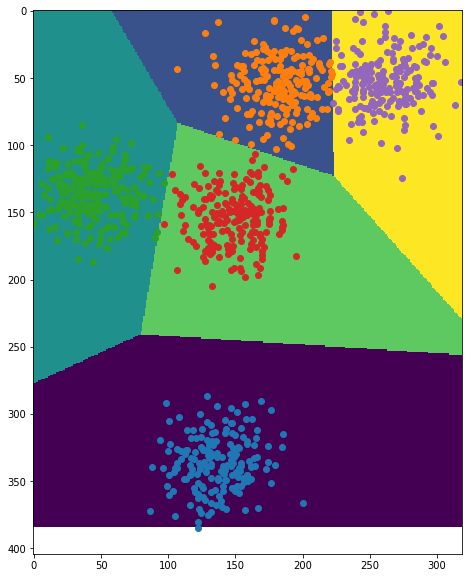

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(grid_labels)
for i in range(K):
    cluster = X[labels == i] 
    #plt.plot(*cluster.T, 'o')
    plt.plot(*((cluster - (xmin, ymin)).T * 100), "o")

This amounts to a so-called Voronoi-tesselation

##### What if we don't know the number of clusters?

One thing we can do is try out different numbers of them. As mentioned before, this comes with risks when evaluating the total amount of distortion. But let's check

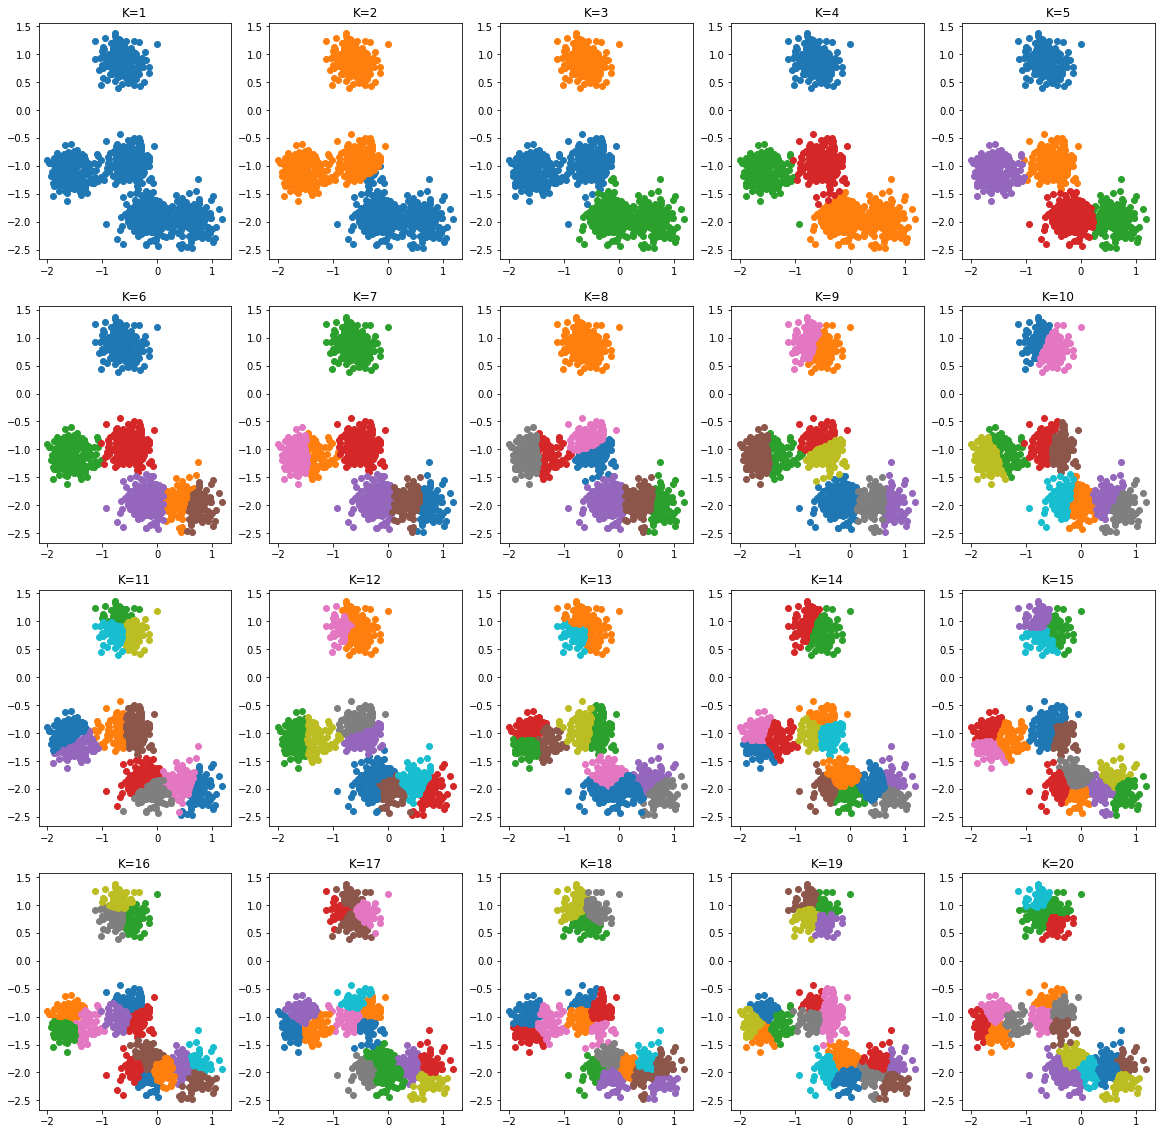

In [33]:
distortions = []

plt.figure(figsize=(20, 20))
for k in range(1, 21):
    km = KMeans(n_clusters=k).fit(X)
    labels = km.predict(X)
    plt.subplot(4, 5, k)
    for i in range(k):
        plt.plot(*X[labels == i].T, "o")
    plt.title(f"K={k}")
    distortions.append(km.inertia_)

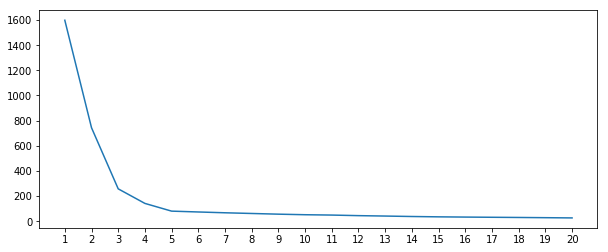

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(1, 21), distortions)
plt.xticks(np.arange(1, 21), [f"{i}" for i in np.arange(1, 21)])
pass

One can indeed tell that the "correct number of clusters", 5, is just at the beginning of the long flat range. This plot is sometimes called an "elbow".

This method is also often criticized, since it is not entirely clear where the elbow starts exactly.

#### Metrics for evaluating K-means clusterings

Evaluating clustering methods in the sense of "how good is this clustering" is hard and probably not even well definable. It will depend very strongly on why one wanted to do the clustering in the first place. Apart from the "elbow" method mentioned above, several methods for evaluating clusterings are described in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). Unfortunately only one single one of them, the *silhouette coefficient*, does not assume the knowledge of the ground-truth labels.

##### Silhouette coefficient
The silhouette coefficient is an evaluation criterion that can be computed point-by-point. For every given point in a clustering it compares the mean distance $a$ to all points in the same cluster to the mean distance $b$ to all points in the next-closest cluster by
$$s = \frac{b - a}{\max(a, b)}$$

In [35]:
from sklearn.metrics.cluster import silhouette_score, silhouette_samples

silhouette_scores = []
silhouette_sample_scores = []
for k in range(2, 21):
    km = KMeans(n_clusters=k).fit(X)
    labels = km.predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    silhouette_sample_scores.append(silhouette_samples(X, labels))

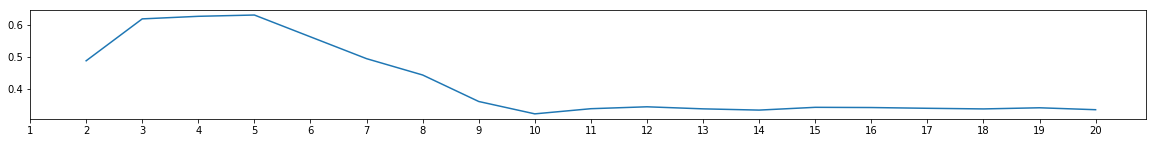

In [36]:
plt.figure(figsize=(20, 2))
plt.plot(range(2, 21), silhouette_scores)
plt.xticks(np.arange(1, 21), [f"{i}" for i in np.arange(1, 21)])
pass

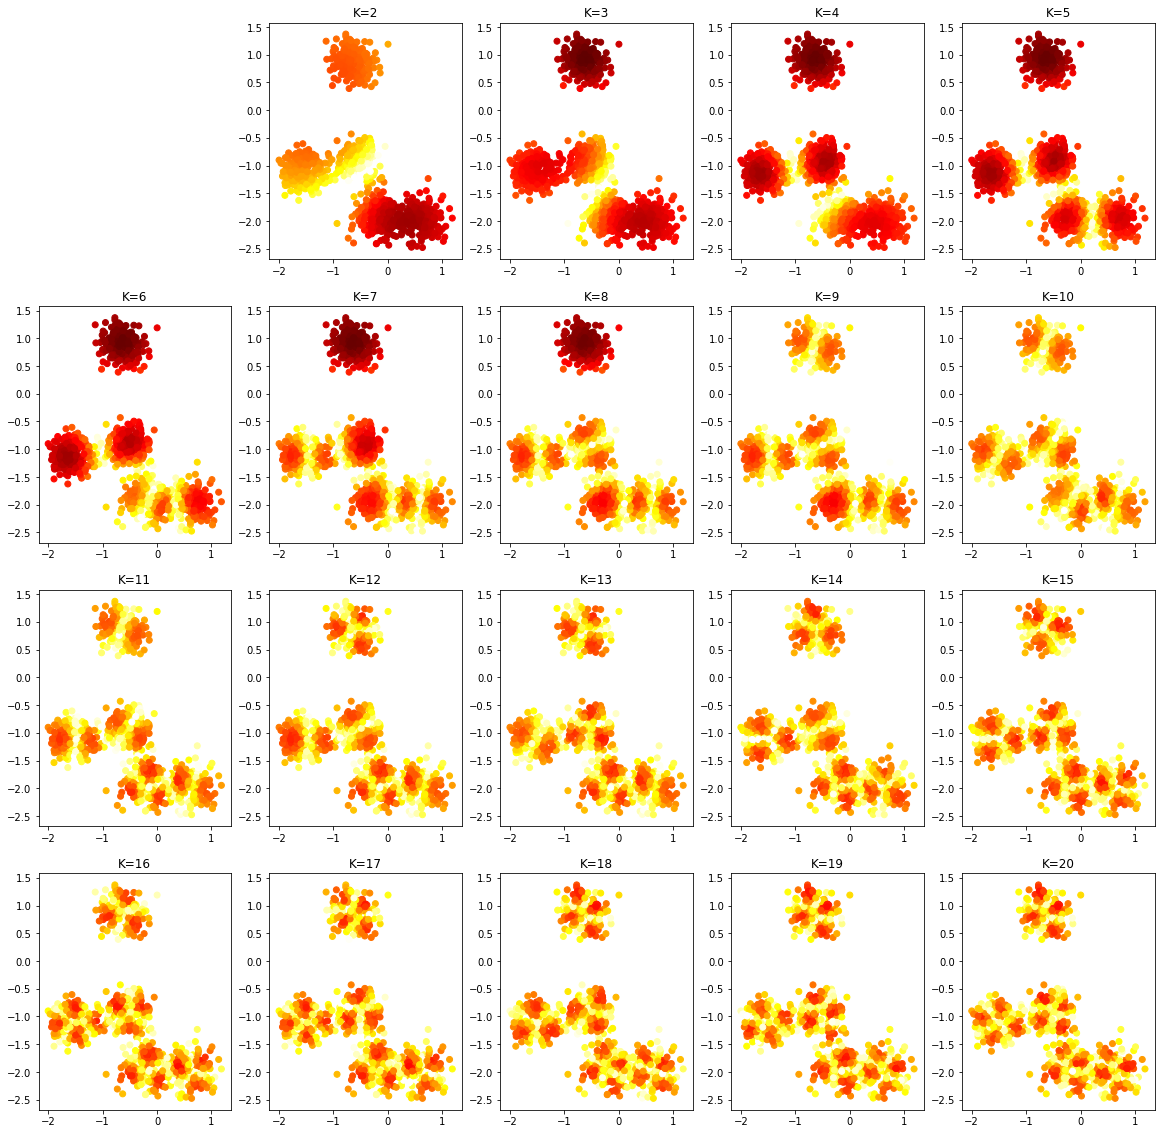

In [37]:
plt.figure(figsize=(20, 20))
for k, sil_samples in zip(range(2, 21), silhouette_sample_scores):
    plt.subplot(4, 5, k)
    plt.scatter(*X.T, color=plt.cm.hot(1 - sil_samples))
    plt.title(f"K={k}")

#### K-medoids
There are sometimes situations in which we can evaluate distances between objects, but there is no continuity in the underlying subspace permitting the notion of a "mean". In this case it can be of interest to select data points as cluster centers.

This is also useful when there are outliers in the data - the mean gets perturbed by this, but the median (which is kind of what we are selecting here) does not

#### Kernel K-means

Sometimes it is useful to use kernels with clustering. This amounts to projecting the data points into a higher-dimensional space before the clustering operation. All computations can be performed in the sample space and the high-dimensional kernel space need not be instantiated. Sometimes certain clusters become more apparent in other feature spaces

## Subspace-based methods
This section collects together methods that assume that there is some continuous subspace of the data space that the data points live in.

### Flat subspaces
A big class of unsupervised learning algorithms works with linear subspaces. This means that they attempt to construct the data points as linear combinations of some prototypes, which are learned from the data under various constraints.

#### PCA - Principle Components Analysis

PCA is a well-known and well-studied linear method of dimensionality reduction. It is used and prevalent in many applications and is often a very strong baseline for unsupervised methods.


There are several ways of deriving it. One is about finding the directions of maximal variance in a point cloud.



In [38]:
from sklearn.decomposition import PCA

In [39]:
# create a point cloud
dimension = 2
n_samples = 200

X = np.random.randn(n_samples, dimension)
random_rotation, _, _ = np.linalg.svd(np.random.randn(2, 2))
random_scaling = np.exp(np.random.randn(2))

X = (X * random_scaling).dot(random_rotation)

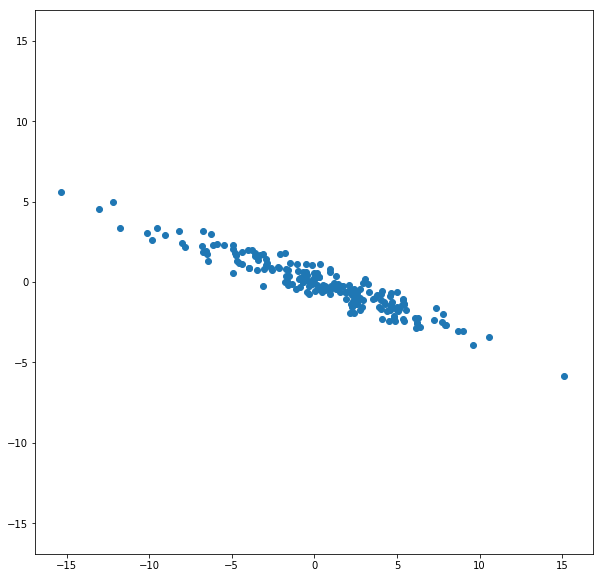

In [40]:
plt.figure(figsize=(10, 10))
plt.plot(*X.T, "o")
m = np.abs(X).max() * 1.1
plt.axis([-m, m, -m, m])
pass

This next cell creates a somewhat sophisticated interactive plot in which you can find the direction of maximum variance by hand

In [41]:
def plot_projection_histogram(angle, offset, X, lines=True):
    rad = angle / 180 * np.pi
    line_vector = np.array((np.cos(rad), np.sin(rad)))
    m = np.linalg.norm(X, axis=1).max() * 1.1
    lx, ly = line_vector[:, np.newaxis] * (-m, m)
    ly += offset
    offset_vector = np.array((0, offset)) - line_vector * line_vector.dot(np.array((0, offset)))
    px, py = line_vector[:, np.newaxis] * X.dot(line_vector) + offset_vector[:, np.newaxis]
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(*X.T, "o")
    plt.plot(lx, ly)
    plt.plot(px, py, ".")
    if lines:
        xs = np.vstack((X[:, 0], px))
        ys = np.vstack((X[:, 1], py))
        plt.plot(xs, ys, "r", lw=0.5)
    plt.axis((-m, m, -m, m))
    
    projection_location = px * line_vector[0] + py * line_vector[1]
    plt.subplot(1, 2, 2)
    bins = np.linspace(-1.2 * m, 1.2 * m, X.shape[0] // 10)
    plt.hist(projection_location, bins=bins)
    plt.title(f"variance: {np.var(projection_location):0.2f}", fontsize=20)

In [42]:
from ipywidgets import interact, FloatSlider
from functools import partial
def plotter(angle, offset):
    return plot_projection_histogram(angle, offset, X=X)

In the next cells, use the sliders to find the direction of maximal variance

In [46]:
angle_slider = FloatSlider(0., min=-95., max=95., step=1.)
offset_slider = FloatSlider(0., min=-10, max=10, step=.1)
i = interact(plotter, angle=angle_slider, offset=offset_slider)

interactive(children=(FloatSlider(value=0.0, description='angle', max=95.0, min=-95.0, step=1.0), FloatSlider(…

Now let's find them using PCA

In [47]:
from sklearn.decomposition import PCA

We create a `PCA` object

In [48]:
pca = PCA(n_components=2)

Now we can fit it to the data

In [49]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now that the PCA object is fit to the data, we can query it for different properties of the data.

Let's start with explained variance.

In [50]:
pca.explained_variance_

array([24.10720869,  0.2436641 ])

If you aligned the above line with the maximal direction of variance, then it should show the value indicated in the first position.

Next we can take a look at PCA components

In [51]:
pca.components_

array([[-0.94535117,  0.32605394],
       [-0.32605394, -0.94535117]])

The first component is the first row of the above matrix and should show a vector parallel with the maximal variance axis.

In [52]:
hand_selected_direction = np.array((np.cos(angle_slider.value / 180 * np.pi),
                                    np.sin(angle_slider.value / 180 * np.pi)))


In [53]:
pca.components_[0].dot(hand_selected_direction)

-0.9962393494614279

If the slider was set to be parallel to the maximum variance axis, this value should be high, close to 1 or -1

#### PCA on faces

In [54]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [55]:
faces['images'].shape

(400, 64, 64)

We can create a panel to take a look at the data

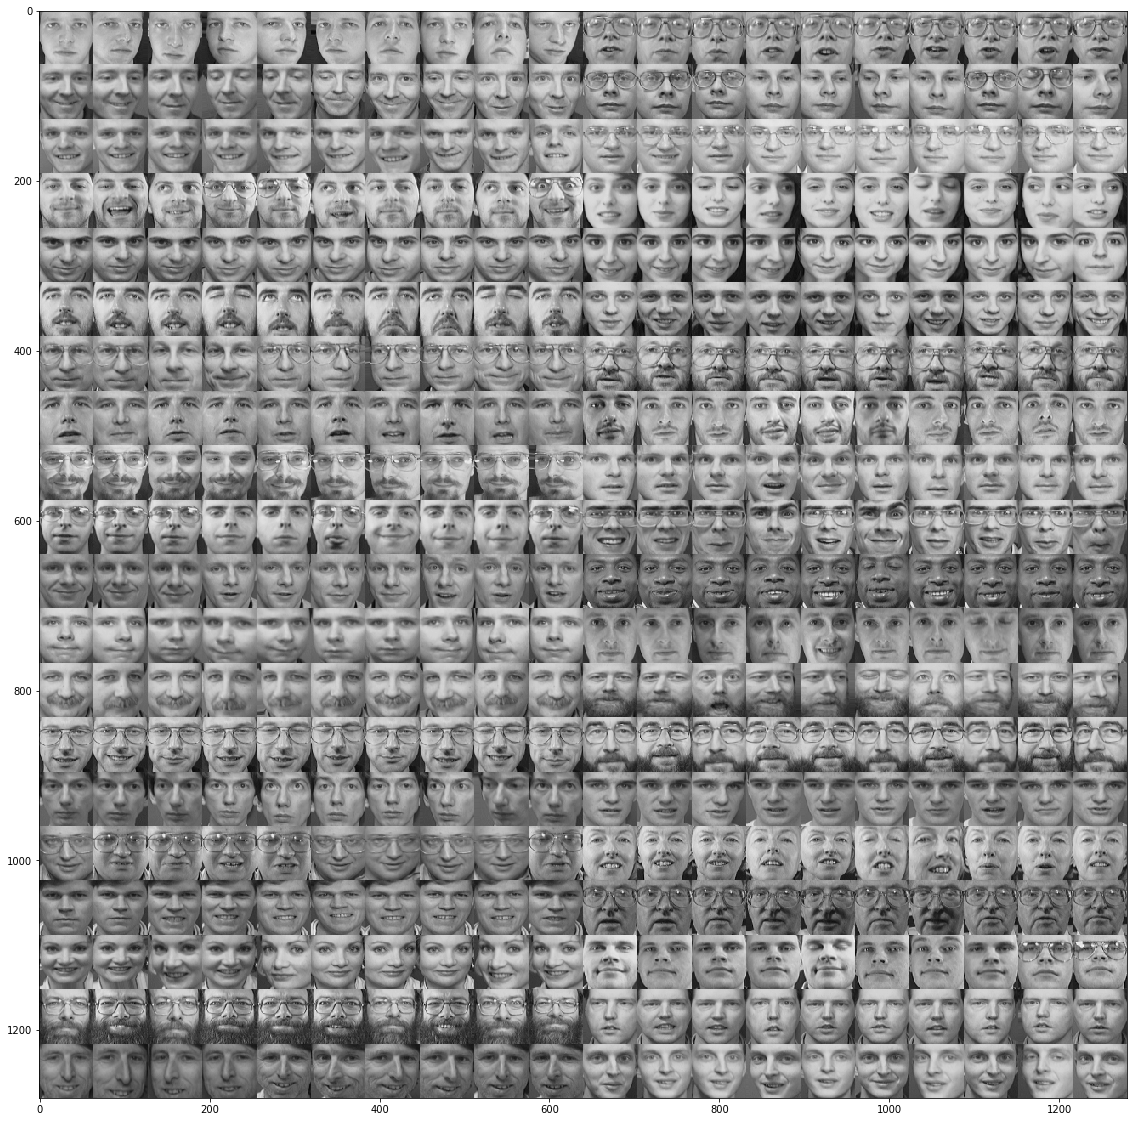

In [56]:
plt.figure(figsize=(20, 20))
plt.imshow(faces['images'].reshape(20, 20, 64, 64).transpose(0, 2, 1, 3).reshape(20 * 64, -1), cmap="gray")

Let's create a PCA object for these faces

In [57]:
faces_pca = PCA(n_components=100)

and fit it to the data

In [58]:
faces_pca.fit(faces['images'].reshape(faces['images'].shape[0], -1))

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can plot the explained variance by the components

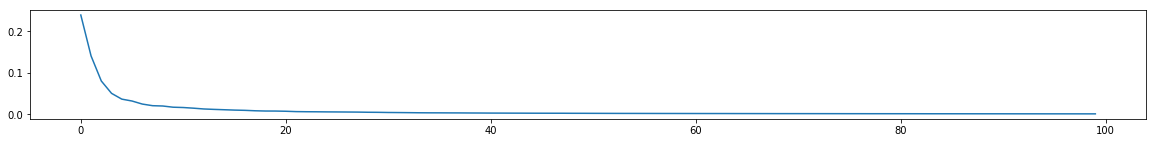

In [59]:
plt.figure(figsize=(20, 2))
plt.plot(faces_pca.explained_variance_ratio_)

We observe that there is not much variance left after 5 components. Let's plot the first 10.

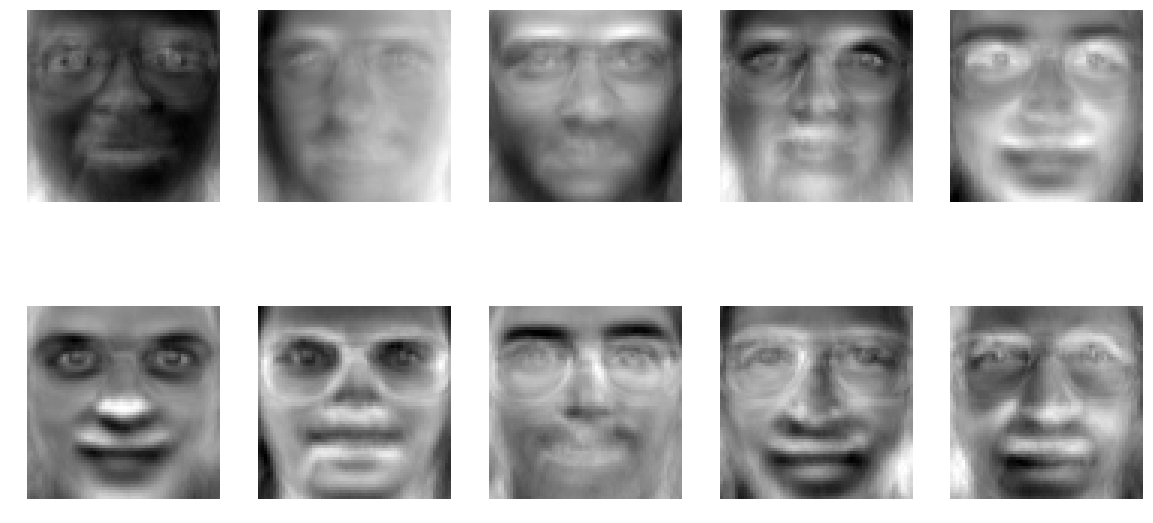

In [60]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(faces_pca.components_[i].reshape(64, 64), cmap="gray")
    plt.axis('off')

We can see that the different components highlight different parts of the faces.

We can also display the mean face:

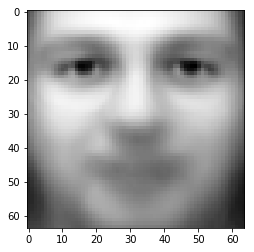

In [61]:
plt.imshow(faces_pca.mean_.reshape(64, 64), cmap="gray")

We can conclude from this analysis that (aligned) faces live in a *relatively* small subspace as far as PCA is concerned. (Evidently faces can also vary much more that those shown in the dataset)

#### Image patches
Another informative analysis is to decompose small patches of images, where the exact location of the patch cannot be known. This leads to different types of components.

Let's get an image:

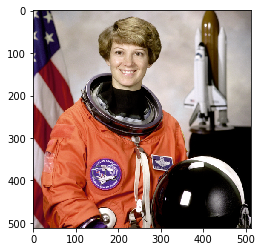

In [62]:
from skimage.data import astronaut
a = astronaut()

plt.imshow(a)

And use a convenience function to extract patches

In [63]:
from sklearn.feature_extraction.image import extract_patches_2d

In [64]:
patches = extract_patches_2d(a, (8, 8))

In [65]:
patches.shape

(255025, 8, 8, 3)

Then we do a PCA

In [66]:
patch_pca = PCA(n_components=100).fit(patches.reshape(patches.shape[0], -1))

and create little component images which we renormalize for display

In [67]:
component_images = patch_pca.components_.reshape((-1,) + patches.shape[1:])
component_images = (component_images - component_images.min(axis=(1,2,3), keepdims=True))
component_images = component_images / component_images.reshape(len(component_images), -1).ptp(axis=1).reshape(-1, 1, 1, 1)

Then we display them as a panel

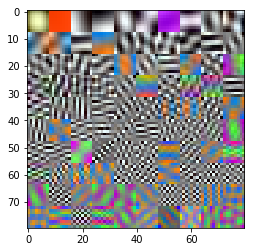

In [68]:
plt.imshow(component_images.reshape(10, 10, 8, 8, 3).transpose(0, 2, 1, 3, 4).reshape(80, 80, 3))

We observe very regular, predominantly black and white patterns. These are almost exactly the Fourier components of these 8x8 patches.

#### ICA

Instead of searching orthogonal components, which is what PCA does due to its loss, one can attempt to find statistically independent components. ICA is one of these ways. Let's make some data that can make this clear

In [81]:
n_samples = 1000
X = np.random.rand(n_samples, 2)

s = .9
shear_mat = np.array([[1, s], [0, 1]])
X = X.dot(shear_mat.T)

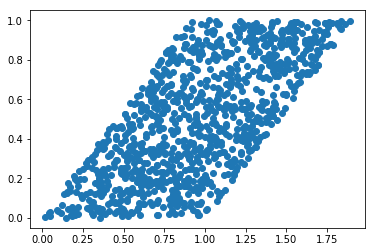

In [82]:
plt.plot(*X.T, "o")

In [83]:
from sklearn.decomposition import FastICA

In [84]:
ica = FastICA(n_components=2, max_iter=1000)

In [85]:
ica.fit(X)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=1000,
    n_components=2, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [86]:
ica.components_

array([[ 0.00594341, -0.11445181],
       [ 0.10954885, -0.09673937]])

(-0.09440032877937964,
 1.982406904366972,
 -0.17015490449685383,
 1.05531314058427)

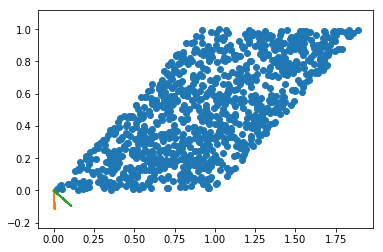

In [91]:
plt.plot(*X.T, "o")
plt.plot([0, ica.components_[0, 0]] * 10, [0, ica.components_[0, 1]] * 10)
plt.plot([0, ica.components_[1, 0]] * 10, [0, ica.components_[1, 1]] * 10)
plt.axis("equal")

The components are the little lines at the bottom. It becomes clear that they are either aligned with or orthogonal to the data axes. They are exactly at the angle to each other that the data takes to itself

We can also plot the outcome of the transformation that ICA induces, which is to try to make the data as independent as possible.

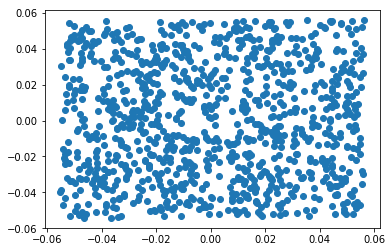

In [76]:
plt.plot(*ica.transform(X).T, "o")

Since we generated the data ourselves, we can see what ICA estimates. It actually estimates, up to permutation of axes and orientation, an inverse of the shear matrix used to generate the data! This is exactly why it is able to straighten out the point cloud.

[[ 0.00594341 -0.10910275]
 [ 0.10954885  0.00185459]]


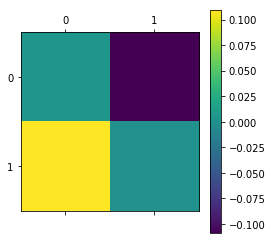

In [93]:
print(ica.components_.dot(shear_mat))
plt.matshow(ica.components_.dot(shear_mat))
plt.colorbar()

Let's take a look at PCA for comparison

In [77]:
pca2 = PCA(n_components=2).fit(X)

(-0.8787700882577317,
 2.019757845294513,
 -0.834350261859654,
 1.0869414909348796)

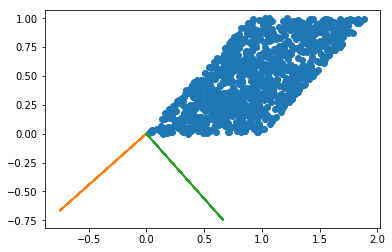

In [94]:
plt.plot(*X.T, "o")
plt.plot([0, pca2.components_[0, 0]] * 10, [0, pca2.components_[0, 1]] * 10)
plt.plot([0, pca2.components_[1, 0]] * 10, [0, pca2.components_[1, 1]] * 10)
plt.axis("equal")

Since these directions are orthogonal to each other, they will definitely not be able to undo the transform we applied

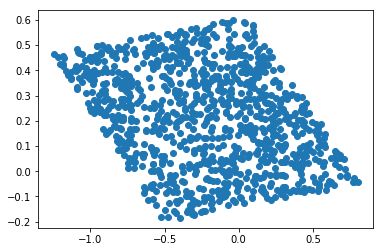

In [95]:
plt.plot(*pca2.transform(X).T, "o")

As we see, it just rotates the data, but the sheared shape remains.

#### ICA on image patches
While PCA applied to image patches finds orthogonal components, and ends of roughly finding Fourier components of the square basis, ICA does not have this orthogonality restriction and is free to find actually statistically independent components.

These will be much more localized in space, since a lot of variability in images lies in localized contours.

We create and ICA object with 100 components

In [ ]:
patch_ica = FastICA(n_components=100)

We fit is to raveled patch data

In [97]:
patch_ica.fit(patches.reshape(patches.shape[0], -1))

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=100, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

We take the components and shape them back into patch shape. Then we subtract minimum and divide by the difference between minimum and maximum (peak-to-peak, `ptp`) in order to bring the patches to the $[0,1]^3$ interval for color display

In [98]:
ica_component_images = patch_ica.components_.reshape((-1,) + patches.shape[1:])
ica_component_images = (ica_component_images - ica_component_images.min(axis=(1,2,3), keepdims=True))
ica_component_images = ica_component_images / ica_component_images.reshape(len(ica_component_images), -1).ptp(axis=1).reshape(-1, 1, 1, 1)

We next display the patches as a panel through appropriate reshaping and transposing

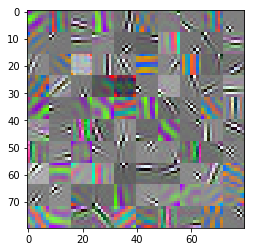

In [100]:
plt.imshow(ica_component_images.reshape(10, 10, 8, 8, 3).transpose(0, 2, 1, 3, 4).reshape(80, 80, 3))

#### ICA on faces
We can of course also look at the independent components of the faces:

In [101]:
faces_ica = FastICA(n_components=100, max_iter=1000)

In [102]:
faces_ica.fit(faces['images'].reshape(faces['images'].shape[0], -1))

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=1000,
    n_components=100, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

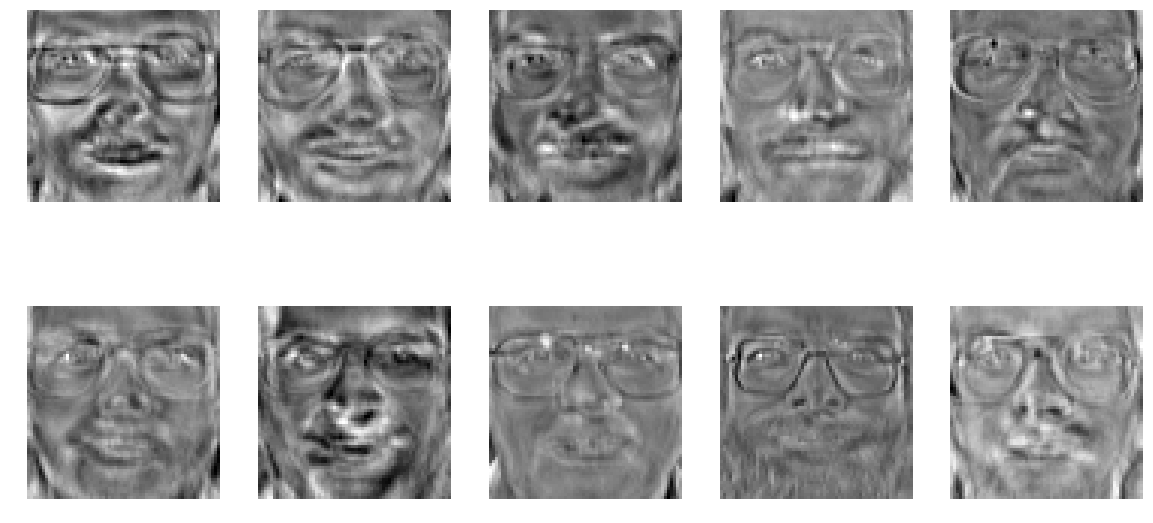

In [103]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(faces_ica.components_[i].reshape(64, 64), cmap="gray")
    plt.axis('off')

#### L1 dictionary learning

$\ell_1$-penalized dictionary learning attempts to find image components such that an image can be reconstructed using a sparse linear combination of these components. It minimizes the following (biconvex) optimization problem

$$\arg\min_D \min_\alpha \|X - D\alpha\|^2 + \lambda \|\alpha\|_1,$$

where $D$ is a dictionary of template signals

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import MiniBatchDictionaryLearning

In [106]:
dl = make_pipeline(StandardScaler(), MiniBatchDictionaryLearning(n_components=128, n_iter=500, n_jobs=1, batch_size=2))

In [136]:
dl.fit(patches.reshape(patches.shape[0], -1))

/home/michaeleickenberg/software/scikit-learn/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/michaeleickenberg/software/scikit-learn/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


MemoryError: 

In [249]:
dl.steps[1][1].components_.shape

(512, 192)

In [250]:
dl_component_images = dl.steps[1][1].components_.reshape((-1,) + patches.shape[1:])
dl_component_images = (dl_component_images - dl_component_images.min(axis=(1,2,3), keepdims=True))
dl_component_images = dl_component_images / dl_component_images.reshape(len(dl_component_images), -1).ptp(axis=1).reshape(-1, 1, 1, 1)

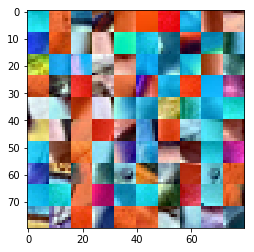

In [251]:
plt.imshow(dl_component_images[:100].reshape(10, 10, 8, 8, 3).transpose(0, 2, 1, 3, 4).reshape(80, 80, 3))

##### (Olshausen dictionary learning?)
### Curved subspaces
#### Isomap
#### LLE
#### MDS
## Probabilistic methods
### Probabilistic PCA
### GMM
### Dirichlet process?

# END OF LECTURE

### Spectral Clustering

Spectral clustering is for data represented as a graph. It picks out well-connected components of a graph.

In [44]:
import networkx as nx

In [46]:
kc = nx.karate_club_graph()

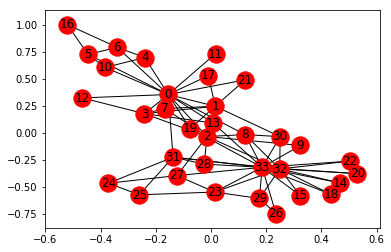

In [52]:
nx.draw_networkx(kc)

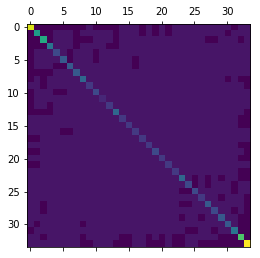

In [57]:
plt.matshow(nx.laplacian_matrix(kc).toarray())

In [58]:
v, V = np.linalg.eigh(nx.laplacian_matrix(kc).toarray())

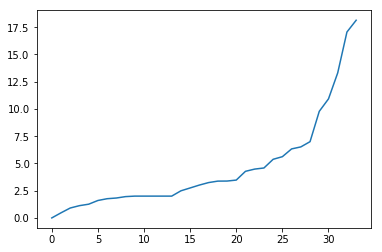

In [62]:
plt.plot(v)

In [60]:
skm = KMeans(n_clusters=2).fit(V[:, 1:3])
l = skm.predict(V[:, 1:3])

In [61]:
l

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [53]:
from sklearn.cluster import SpectralClustering

In [54]:
sc = SpectralClustering?

In [ ]:
sc = SpectralClustering